In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed.csv", index_col=0)
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,returned,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,No,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,No,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,No,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,No,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,No,Cash


## Distribution of ages

Text(0.5, 1.0, 'Ages of Users')

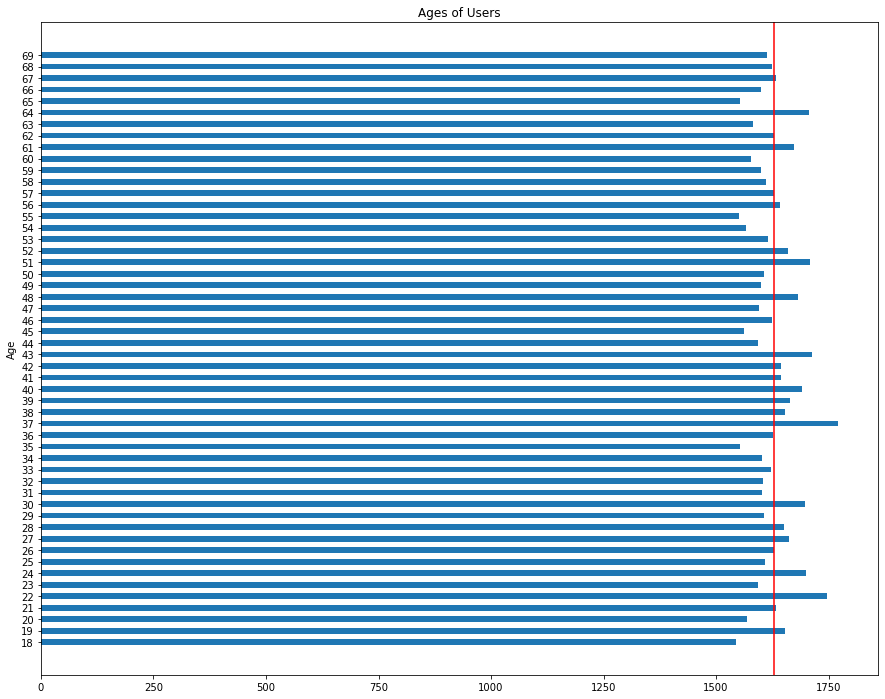

In [3]:
ages = df['age'].value_counts().sort_index()
plt.figure(figsize=(15,12))
plt.barh(ages.index, ages.values, 0.5, tick_label=ages.index)
plt.axvline(ages.values.mean(), color='r')
#, title="Ages of Users", ylabel="Age")
plt.ylabel("Age")
plt.title("Ages of Users")
#.plot(kind='barh', figsize=(15,12), title="Ages of Users", ylabel="Age")

## Distribution of Gender

<AxesSubplot:title={'center':'Gender'}>

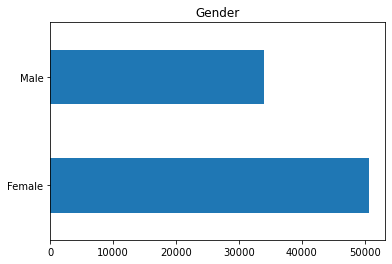

In [4]:
df['gender'].value_counts().plot(kind='barh', title='Gender')

## Target variable distribution

<AxesSubplot:title={'center':'Returned?'}>

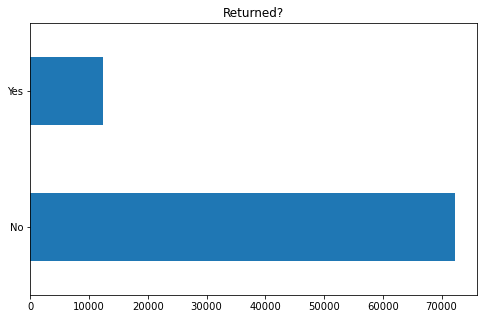

In [5]:
df['returned'].value_counts().plot(kind='barh', figsize=(8,5), title='Returned?')

<AxesSubplot:title={'center':'Returned?'}>

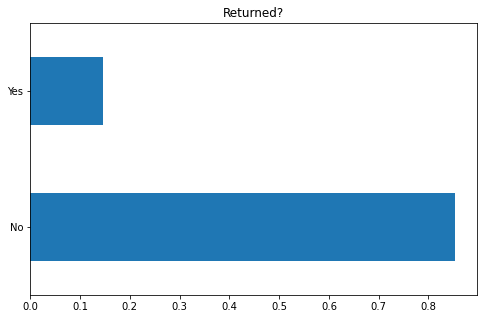

In [6]:
df['returned'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5), title='Returned?')

## Payment Method Distribution

<AxesSubplot:title={'center':'Payment Methods'}>

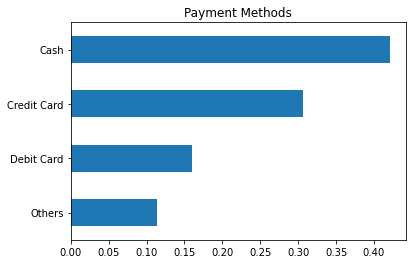

In [7]:
df['pay_method'].value_counts(ascending=True, normalize=True).plot(kind='barh', title="Payment Methods")

## Membership Distribution

<AxesSubplot:title={'center':'Membership Type'}>

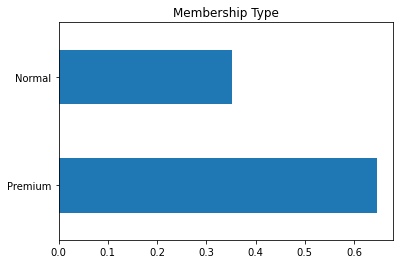

In [8]:
df['membership'].value_counts(normalize=True).plot(kind='barh', title="Membership Type")

## Language Distribution

<AxesSubplot:title={'center':'Languages'}>

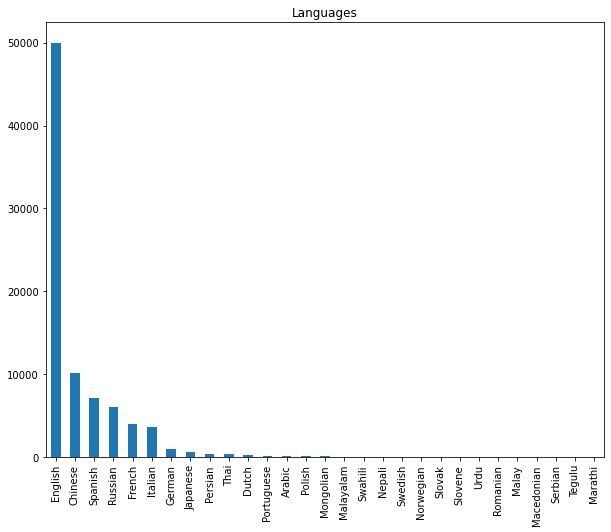

In [9]:
df['language'].value_counts().plot(kind='bar', title="Languages", figsize=(10,8))

## Access Method

<AxesSubplot:title={'center':'Access Method'}>

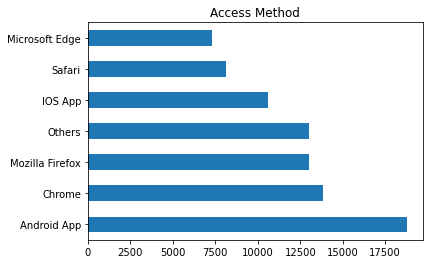

In [10]:
df['accessed_Ffom'].value_counts().plot(kind='barh', title="Access Method")

## Country

<AxesSubplot:title={'center':'Country'}>

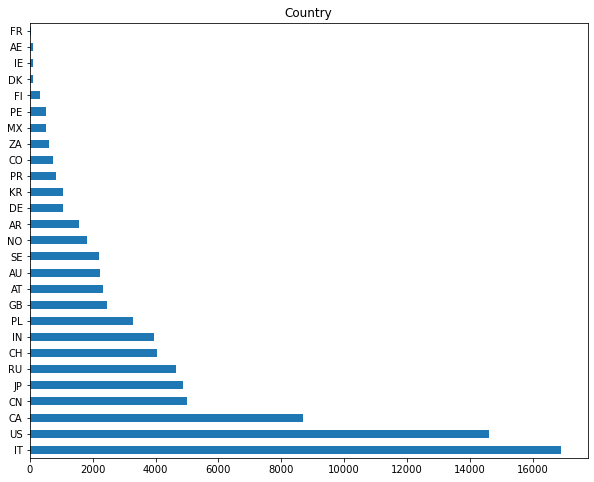

In [11]:
df['country'].value_counts().plot(kind='barh', title="Country", figsize=(10,8))